# Summarizing Two Categorical Variables

Data science is all about relationships between variables. How do we summarize and visualize the relationship between two categorical variables?

For example, what can we say about the relationship between coded gender and survival on the Titanic?

In [1]:
import pandas as pd

In [2]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,pclass,crew
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,3.0,NaN
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,3.0,NaN
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,NaN,deck crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,NaN,victualling crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,NaN,engineering crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,NaN,restaurant staff


We can summarize each variable individually like we did in the previous lesson.

In [3]:
df_titanic["gender"].value_counts()

gender
male      1718
female     489
Name: count, dtype: int64

In [4]:
df_titanic["survived"].value_counts()

survived
0    1496
1     711
Name: count, dtype: int64

But this does not tell us how gender interacts with survival. To do that, we need to produce a **cross-tabulation**, or "cross-tab" for short. (Statisticians often call this a *contigency table* or a *two-way table*.)

In [5]:
pd.crosstab(df_titanic["survived"], df_titanic["gender"])

gender,female,male
survived,,
0,130,1366
1,359,352


A cross-tabulation of two categorical variables is a two-dimensional array, with the levels of one variable along the rows and the levels of the other variable along the columns. Each cell in this array contains the number of observations that had a particular combination of levels. So in the Titanic data set, there were 359 females who survived and 1366 males who died. From the cross-tabulation, we can see that there were more females who survived than not, while there were more males who died than not. Clearly, gender had a strong influence on survival because of the Titanic's policy of ["women and children first"](https://en.wikipedia.org/wiki/Women_and_children_first). (However, [the Titanic seems to be unusual in this regard](https://www.cbsnews.com/news/women-and-children-first-just-a-myth-researchers-say/).)

To get proportions instead of counts, we specify `normalize=True`.


In [6]:
joint_survived_gender = pd.crosstab(df_titanic["survived"], df_titanic["gender"],
                                    normalize=True)
joint_survived_gender

gender,female,male
survived,,
0,0.058903,0.618940
1,0.162664,0.159493


Notice that the four proportions in this table add up to 1.0. Each of these proportions is called a **joint proportion** and can be denoted, for example, as

$$ P(\text{female}, \text{died}) = 0.058903.$$

Collectively, these proportions make up the
*joint distribution* of the variables **survived** and **gender**.

## Marginal Distributions

Is it possible to recover the distribution of **gender** alone from the joint distribution of **survived** and **gender**?

Yes! We simply sum the probabilities for each **gender** over all the possible levels of **survived**.

\begin{align}
P(\text{female}) = P(\text{female}, \text{died}) + P(\text{female}, \text{survived}) &= 0.058903 + 0.162664 = 0.221567 \\
P(\text{male}) = P(\text{male}, \text{died}) + P(\text{male}, \text{survived}) &= 0.618940 + 0.159493 = 0.778433
\end{align}

In code, this can be achieved by summing the `DataFrame` _over_ one of the dimensions. We can specify which dimension to *sum over*, using the `axis=` argument to `.sum()`.

- `axis=0` refers to the rows. In the current example, **survived** is the variable along this axis.
- `axis=1` refers to the columns. In the current example, **gender** is the variable along this axis.

Since we want to sum _over_ the **survived** variable, we specify `.sum(axis=0)`.

In [7]:
marginal_gender = joint_survived_gender.sum(axis=0)
marginal_gender

gender
female    0.221568
male      0.778432
dtype: float64

When calculated from a joint distribution, the distribution of one variable is called a _marginal distribution_. So the above is the marginal distribution of **gender**.

The name "marginal distribution" comes from the fact that it is customary to write these totals in the _margins_ of the table. In fact `pd.crosstab()` has an argument `margins=` that automatically adds these margins to the cross-tabulation.

In [8]:
pd.crosstab(df_titanic["survived"], df_titanic["gender"],
            normalize=True, margins=True)

gender,female,male,All
survived,,,
0,0.058903,0.618940,0.677843
1,0.162664,0.159493,0.322157
All,0.221568,0.778432,1.000000


While the margins are useful for display purposes, they actually make computations more difficult, since it is easy to mix up which numbers correspond to joint probabilities and which ones correspond to marginal probabilities.

Likewise, to obtain the marginal distribution of **survived**, we sum over the possible levels of **gender** (which is the variable along `axis=1`).

In [9]:
survived = joint_survived_gender.sum(axis=1)
survived

survived
0    0.677843
1    0.322157
dtype: float64

We can check this answer by calculating the distribution of **survived** directly from the original data.


In [10]:
df_titanic["survived"].value_counts(normalize=True)

survived
0    0.677843
1    0.322157
Name: proportion, dtype: float64

## Conditional Distributions

Let's take another look at the joint distribution of **survived** and **gender**.

In [11]:
joint_survived_gender

gender,female,male
survived,,
0,0.058903,0.618940
1,0.162664,0.159493


From the joint distribution, it is tempting to conclude that females and males did not differ too much in their survival rates, since

$$ P(\text{female}, \text{survived}) = 0.162664 $$

is not too different from

$$ P(\text{male}, \text{survived}) = 0.159493. $$

This is because there were 359 women and 352 men who survived, out of 2207 passengers.

But this is the wrong comparison. The joint proportions are affected by the baseline gender proportions, and over three-quarters of the people aboard the Titanic were men. $P(\text{male}, \text{survived})$ and $ P(\text{female}, \text{survived})$ should not even be close if men were just as likely to survive as women, simply because of the sheer number of men aboard.

A better comparison is between the **conditional proportions**. We should compare

$$ P(\text{survived} | \text{female}) $$

to

$$ P(\text{survived} | \text{male}). $$

To calculate each conditional proportion, we simply divide the joint proportion by the appropriate marginal proportion. That is,

\begin{align}
P(\text{survived} | \text{female}) = \frac{P(\text{female}, \text{survived})}{P(\text{female})} &= \frac{0.162664}{0.221568} = .7341 \\
P(\text{survived} | \text{male}) = \frac{P(\text{male}, \text{survived})}{P(\text{male})} &= \frac{0.159493}{0.778432} = .2049
\end{align}

The conditional proportions expose the stark difference in survival rates. One way to think about conditional proportions is that they _adjust_ for the baseline gender proportions. By dividing by $P(\text{male})$ and $P(\text{female})$, we adjust for the fact that there were more men and fewer women on the Titanic, thus enabling an apples-to-apples comparison.

In code, this can be achieved by dividing the joint distribution by the marginal distribution (of **gender**). However, we have to be careful:

- The joint distribution is a two-dimensional array. It is stored as a `DataFrame`.
- The marginal distribution (of **gender**) is a one-dimensional array. It is stored as a `Series`.

How is it possible to divide a two-dimensional object by a one-dimensional object? Only if we _broadcast_ the one-dimensional object over the other dimension. A toy example is illustrated below.

\begin{align}
\begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix} \Big/ \begin{bmatrix} 7 \\ 8 \end{bmatrix} &= \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix}  \Big/ \begin{bmatrix} 7 & 8 \\ 7 & 8 \\ 7 & 8 \end{bmatrix} \\
&= \begin{bmatrix} 1/7 & 2/8 \\ 3/7 & 4/8 \\ 5/7 & 6/8 \end{bmatrix}
\end{align}

To do this in `pandas`, we use the `.divide()` method, specifying the dimension on which to align the `Series` with the `DataFrame`. Since **gender** is on `axis=1` of `joint_survived_gender`, we align the `DataFrame` and `Series` along `axis=1`.

In [12]:
cond_survived_given_gender = joint_survived_gender.divide(marginal_gender, axis=1)
# In this case, joint_survived_gender / gender would also haved worked,
# but better to play it safe and be explicit about the axis.

cond_survived_given_gender

gender,female,male
survived,,
0,0.265849,0.795111
1,0.734151,0.204889


Every proportion in this table represents a conditional proportion of survival status given gender. So from the table, we can read that

$$ P(\text{survived} | \text{female}) = 0.734151. $$

Notice that each column sums to $1.0$---as it must, since given the information that a person was female, there are only two possibilities: they either survived or died.

In other words, we have a distribution of **survived** for *each* level of **gender**. We might wish to compare these two distributions. When we call `.plot.bar()` on the `DataFrame`, it will plot the values in each column as a set of bars with its own color.

<Axes: xlabel='survived'>

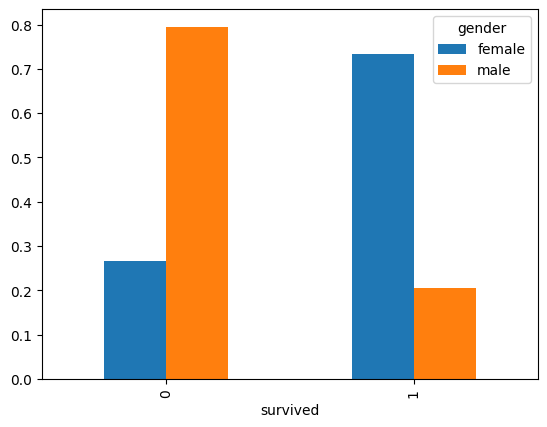

In [13]:
cond_survived_given_gender.plot.bar()

A different way to visualize a conditional distribution is to use a stacked bar graph. Here, we want one bar for females and another for males, each one divided in proportion to the survival rates for that gender. First, let's take a look at the desired graph.

<Axes: xlabel='gender'>

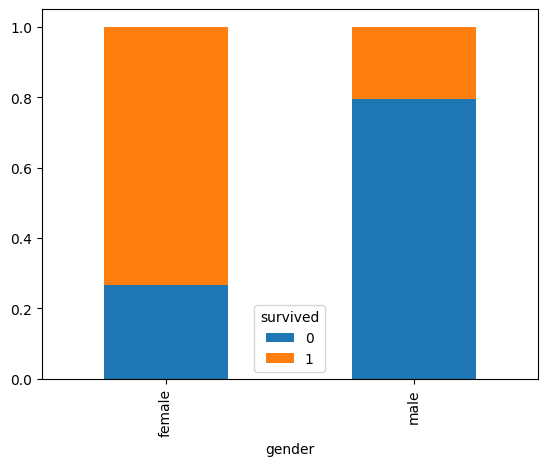

In [14]:
cond_survived_given_gender.T.plot.bar(stacked=True)

Now, let's unpack the code that generated this graphic. Recall that `.plot.bar()` plots each column of a `DataFrame` in a different color. Here we want different colors for each level of **survived**, so we need to swap the rows and columns of `cond_survived_gender`. In other words, we need the _transpose_ of the `DataFrame`, which is accomplished using `.T`.

In [15]:
cond_survived_given_gender.T

survived,0,1
gender,,
female,0.265849,0.734151
male,0.795111,0.204889


When we call `.plot.bar()` on this transposed `DataFrame`, with `stacked=True`, we obtain the stacked bar graph above.

What if we want to change the order of the stacking, so that 1 (survived) is on the bottom? We can sort the "survived" index of the transposed data frame to be in descending order (`ascending = False`) before plotting. "Survived" is represented by the columns of the transposed data frame, so we sort along `axis = 1`.

In [16]:
cond_survived_given_gender.T.sort_index(axis = 1, ascending=False)

survived,1,0
gender,,
female,0.734151,0.265849
male,0.204889,0.795111


<Axes: xlabel='gender'>

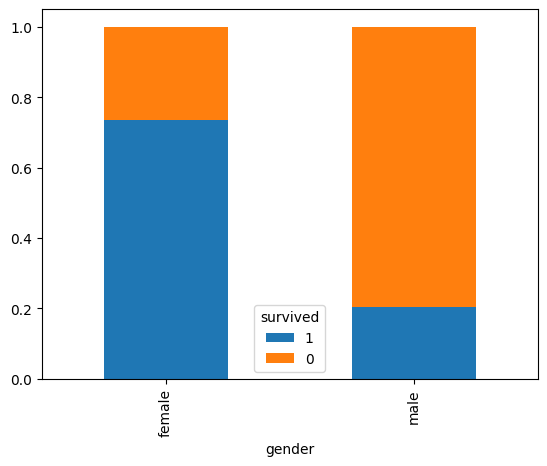

In [17]:
cond_survived_given_gender.T.sort_index(axis = 1, ascending=False).plot.bar(stacked=True)

## Communicating Differences in Proportions

We see that the proportion of females onboard who survived is 0.734, and the proportion of males on board who survived is 0.204. In percentage terms: 73.4% of females onboard survived, and 20.4% of males onboard survived. How do we report the difference between these two values? There are a number of ways:

1. As an _additive change_: "Females were
$$ 73.4\% - 20.4\% = 53.0 \text{ percentage points} $$
more likely to survive than males."
2. As a _relative change_ (often called "relative risk"): "Females were
$$ 73.4\% \big/ 20.4\% = 3.60 \text{ times} $$
more likely to survive than males."
3. We can translate a relative changes to a *percentage change* by subtracting $1$ and multiplying by $100\%$. So we can rephrase the above as: "Females were
$$ 100\% \times (3.60 - 1.00) = 260\% $$
more likely to survive than males."
4. As an _odds ratio_: "The odds of a female surviving was
$$ \frac{73.4\% \big/ (100\% - 73.4\%)}{20.4\% \big/ (100\% - 20.4\%)} = 10.8 \text{ times} $$
greater than the odds of a male surviving."

Note that additive changes and percent changes should be compared to a baseline of 0.0 (and can be negative), while relative changes and odds ratios should be compared to a baseline of 1.0 (and cannot be negative).

Watch out: it is incorrect to say that females are $53.0\%$ more likely to survive than males, since the percentage change is $260\%$. An additive change should always be reported in units of "percentage points".